In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [5]:
files

['unet_ssl_dice_loss_val.json',
 'unet_ssl_dice_loss_train.json',
 'unet_no_ssl_loss_train.json',
 'unet_no_ssl_dice_loss_train.json',
 'unet_no_ssl_dice_loss_val.json',
 'unet_no_ssl_loss_val.json',
 'unet_ssl_hs_distance average_val.json',
 'unet_ssl_loss_val.json',
 'unet_ssl_loss_train.json',
 'unet_no_ssl_hs_distance average_val.json']

unet.ssl.dice.loss.val
unet.no.ssl.dice.loss.val


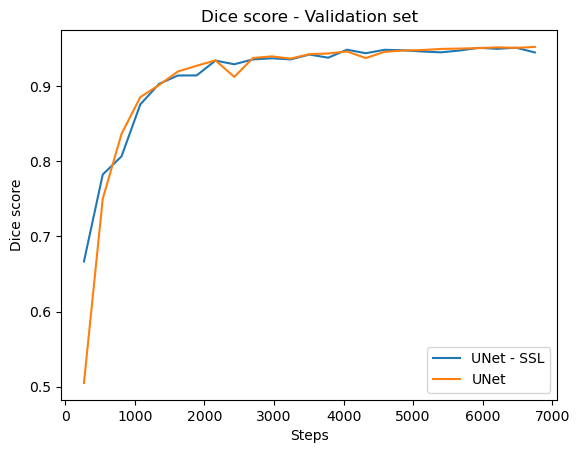

unet.ssl.dice.loss.train
unet.no.ssl.dice.loss.train


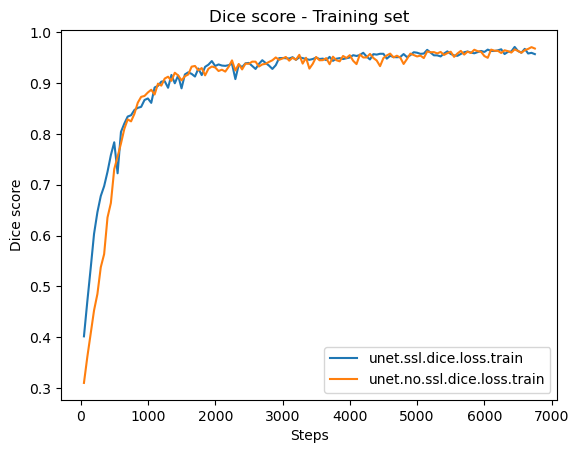

unet.ssl.dice.loss.train
unet.no.ssl.dice.loss.train


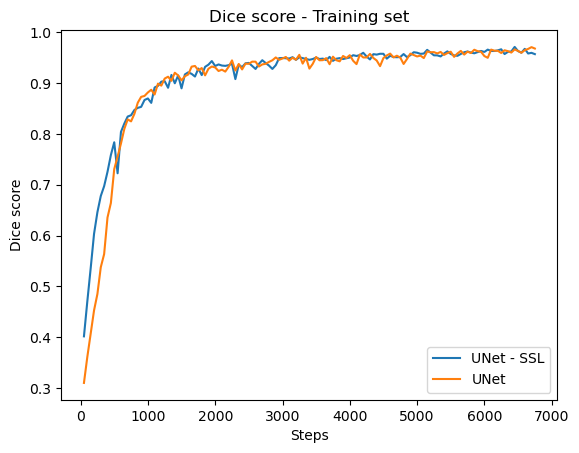

unet.no.ssl.loss.train
unet.ssl.loss.train


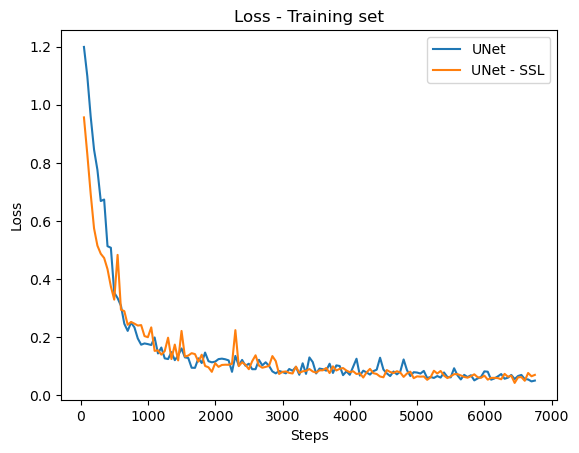

unet.no.ssl.loss.val
unet.ssl.loss.val


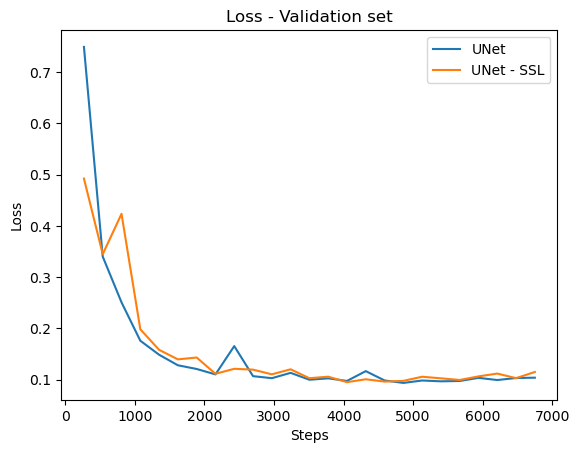

In [2]:
# get names of all files in the folder

files = os.listdir('./')
files = [f for f in files if f.endswith('.json')]

# get the data from all files
data = []
for f in files:
    with open(f, 'r') as file:
        data.append([f,json.load(file)])

filenames = []
for d in data:
    d[0] = d[0].replace('.json','')
    d[0] = d[0].replace('data_','')
    d[0] = d[0].replace('_','.')
    filenames.append(d[0])

# Replace commas with space in filenames
filenames = [f.replace('.',' ') for f in filenames]
filenames = [f.replace('unet','UNet - ') for f in filenames]
# remove words train and val from filenames
filenames = [f.replace('train','') for f in filenames]
filenames = [f.replace('val','') for f in filenames]
# remove words dice, distance, loss from filenames
filenames = [f.replace('dice','') for f in filenames]
filenames = [f.replace('distance','') for f in filenames]
filenames = [f.replace('loss','') for f in filenames]
# remove words hs and average from filenames
filenames = [f.replace('hs','') for f in filenames]
filenames = [f.replace('average','') for f in filenames]

for d in data:
    if 'dice.loss' in d[0]:
        if 'val' in d[0]:
            print(d[0])
            x, y = [x[1] for x in d[1]], [x[2] for x in d[1]]
            # plot x and y
            if 'no.ssl' in d[0]:
                label = 'UNet'
            else:
                label = 'UNet - SSL'
            plt.plot(x, y, label=label)
            # add legends from d[0] name
            plt.legend()
            plt.title('Dice score - Validation set')
            plt.xlabel('Steps')
            plt.ylabel('Dice score')
            # Save as pdf
            plt.savefig('dice_val.pdf')
plt.show()

for d in data:
    if 'dice.loss' in d[0]:
        if 'train' in d[0]:
            print(d[0])
            if 'no.ssl' in d[0]:
                label = 'UNet'
            else:
                label = 'UNet - SSL'
            x, y = [x[1] for x in d[1]], [x[2] for x in d[1]]
            # plot x and y
            plt.plot(x, y, label=d[0])
            # add legends from d[0] name
            plt.legend()
            plt.title('Dice score - Training set')
            plt.xlabel('Steps')
            plt.ylabel('Dice score')
            # Save as pdf
            plt.savefig('dice_train.pdf')
plt.show()

for d in data:
    if 'dice.loss' in d[0]:
        if 'train' in d[0]:
            if 'no.ssl' in d[0]:
                label = 'UNet'
            else:
                label = 'UNet - SSL'
            print(d[0])
            x, y = [x[1] for x in d[1]], [x[2] for x in d[1]]
            # plot x and y
            plt.plot(x, y, label=label)
            # add legends from d[0] name
            plt.legend()
            plt.title('Dice score - Training set')
            plt.xlabel('Steps')
            plt.ylabel('Dice score')
            # Save as pdf
            plt.savefig('dice_train.pdf')
plt.show()

for d in data:
    if 'loss' in d[0] and not 'dice' in d[0]:
        if 'train' in d[0]:
            if 'no.ssl' in d[0]:
                label = 'UNet'
            else:
                label = 'UNet - SSL'
            print(d[0])
            x, y = [x[1] for x in d[1]], [x[2] for x in d[1]]
            # plot x and y
            plt.plot(x, y, label=label)
            # add legends from d[0] name
            plt.legend()
            plt.title('Loss - Training set')
            plt.xlabel('Steps')
            plt.ylabel('Loss')
            # Save as pdf
            plt.savefig('loss_train.pdf')
plt.show()

for d in data:
    if 'loss' in d[0] and not 'dice' in d[0]:
        if 'val' in d[0]:
            if 'no.ssl' in d[0]:
                label = 'UNet'
            else:
                label = 'UNet - SSL'
            print(d[0])
            x, y = [x[1] for x in d[1]], [x[2] for x in d[1]]
            # plot x and y
            plt.plot(x, y, label=label)
            # add legends from d[0] name
            plt.legend()
            plt.title('Loss - Validation set')
            plt.xlabel('Steps')
            plt.ylabel('Loss')
            # Save as pdf
            plt.savefig('loss_val.pdf')
plt.show()



In [3]:
filenames

['UNet -  ssl   ',
 'UNet -  ssl   ',
 'UNet -  no ssl  ',
 'UNet -  no ssl   ',
 'UNet -  no ssl   ',
 'UNet -  no ssl  ',
 'UNet -  ssl    ',
 'UNet -  ssl  ',
 'UNet -  ssl  ',
 'UNet -  no ssl    ']

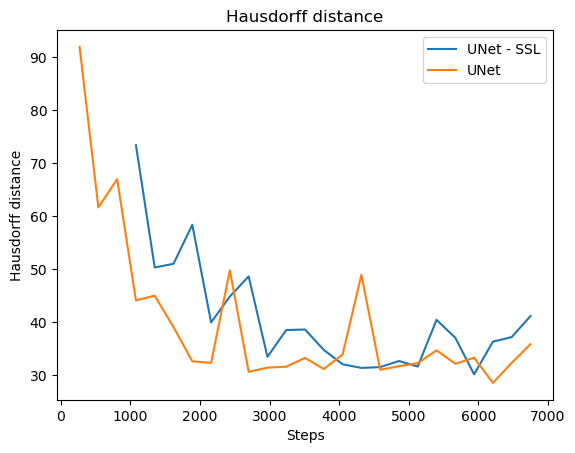

In [4]:
for d in data:
    if 'hs.distance' in d[0]:
        correct_datapoints = []
        for x in d[1]:
            if x[2] != 'NaN':
                correct_datapoints.append(x)
        x, y = [x[1] for x in correct_datapoints], [x[2] for x in correct_datapoints]
        if 'no.ssl' in d[0]:
            label = 'UNet'
        else:
            label = 'UNet - SSL'
        # plot x and y
        plt.plot(x, y, label=label)
        # add legends from d[0] name
        plt.legend()
        plt.title('Hausdorff distance')
        plt.xlabel('Steps')
        plt.ylabel('Hausdorff distance')
        # Save as pdf
        plt.savefig('hs_distance.pdf')
plt.show()

